<a href="https://colab.research.google.com/github/kavyajeetbora/modern_geospatial_stack/blob/master/notebooks/DuckDB_in_Jupyter_Notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DuckDB in Jupyter Notebooks
A streamlined workflow for SQL analysis with DuckDB and Jupyter

## Library Import and Configuration

In [1]:
!pip install --quiet duckdb
!pip install --quiet jupysql
!pip install --quiet duckdb-engine
!pip install --quiet pandas
!pip install --quiet matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.7/95.7 kB 862.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 780.1 kB/s eta 0:00:00


In [2]:
import duckdb
import pandas as pd
# No need to import sqlalchemy or duckdb_engine
#  JupySQL will use SQLAlchemy to auto-detect the driver needed based on your connection string!

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

Deploy Panel apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


We configure jupysql to return data as a Pandas dataframe and have less verbose output

In [3]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

## Connecting to DuckDB
Connect jupysql to DuckDB using a SQLAlchemy-style connection string. You may either connect to an in memory DuckDB, or a file backed db.

In [5]:
%sql duckdb:///:memory:
# %sql duckdb:///path/to/file.db

In [6]:
%%sql
INSTALL httpfs;
INSTALL spatial;

Empty DataFrame
Columns: [Success]
Index: []

In [24]:
%%time

%%sql
LOAD spatial;
LOAD httpfs;

COPY (
    SELECT
        id,
        level,
        height,
        JSON(names) AS names,
        sources[1].dataset AS primary_source,
        JSON(sources) AS sources,
        ST_GeomFromWkb(geometry) AS geometry
    FROM read_parquet('s3://overturemaps-us-west-2/release/2024-06-13-beta.0/theme=buildings/type=*/*', filename=true, hive_partitioning=1)
    WHERE
        bbox.xmin > 76.819702
        AND bbox.xmax < 77.587372
        AND bbox.ymin > 28.361351
        AND bbox.ymax < 28.889180
) TO 'buildings_hyderabad.geojson'
WITH (FORMAT GDAL, DRIVER 'GeoJSON', SRS 'EPSG:4326');

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

CPU times: user 3min 32s, sys: 27.3 s, total: 3min 59s
Wall time: 6min 54s


Empty DataFrame
Columns: [Success]
Index: []

https://bboxfinder.com/

In [25]:
import geopandas as gpd
gdf = gpd.read_file('buildings_hyderabad.geojson')
gdf.sample(10)

id  level  height names  \
202114   08b3da11ae8aefff0200eb1b6408bce9    NaN     NaN  None   
1189412  08b3da102c0e3fff02004118330493db    NaN     NaN  None   
2211079  08b3da1b9bb32fff0200de8da29c0e4f    NaN     NaN  None   
1134606  08b3da102e110fff0200a0fe8a4aeb78    NaN     NaN  None   
2389324  08b3da182c42efff020037c9a9d23d11    NaN     NaN  None   
3322043  08b3da1a56521fff0200041916ed2fa3    NaN     NaN  None   
3328074  08b3da1a72976fff0200c348c5670095    NaN     NaN  None   
1298685  08b3da1055c59fff0200388e2e67b5c8    NaN     NaN  None   
609955   08b3da18a0364fff0200a7d466ac5c82    NaN     NaN  None   
1578237  08b3da18d5c84fff0200f99e0a02ab50    NaN     NaN  None   

                 primary_source  \
202114    Google Open Buildings   
1189412   Google Open Buildings   
2211079  Microsoft ML Buildings   
1134606           OpenStreetMap   
2389324   Google Open Buildings   
3322043   Google Open Buildings   
3328074  Microsoft ML Buildings   
1298685   Google Open Buildings   
609955    Google Open Buildings   
1578237   Google Open Buildings   

                                                   sources  \
202114   [ { "property": "", "dataset": "Google Open Bu...   
1189412  [ { "property": "", "dataset": "Google Open Bu...   
2211079  [ { "property": "", "dataset": "Microsoft ML B...   
1134606  [ { "property": "", "dataset": "OpenStreetMap"...   
2389324  [ { "property": "", "dataset": "Google Open Bu...   
3322043  [ { "property": "", "dataset": "Google Open Bu...   
3328074  [ { "property": "", "dataset": "Microsoft ML B...   
1298685  [ { "property": "", "dataset": "Google Open Bu...   
609955   [ { "property": "", "dataset": "Google Open Bu...   
1578237  [ { "property": "", "dataset": "Google Open Bu...   

                                                  geometry  
202114   POLYGON ((77.03271 28.45709, 77.03265 28.45719...  
1189412  POLYGON ((77.21191 28.53577, 77.21186 28.53579...  
2211079  POLYGON ((77.30338 28.72528, 77.30343 28.72526...  
1134606  POLYGON ((77.20225 28.51609, 77.20222 28.51602...  
2389324  POLYGON ((76.93478 28.86175, 76.93487 28.86186...  
3322043  POLYGON ((77.51922 28.83616, 77.51917 28.83619...  
3328074  POLYGON ((77.50216 28.88507, 77.50223 28.88505...  
1298685  POLYGON ((77.33516 28.50378, 77.33511 28.50378...  
609955   POLYGON ((76.87825 28.70280, 76.87825 28.70284...  
1578237  POLYGON ((77.03821 28.67911, 77.03820 28.67916...

In [27]:
gdf.shape

(3353249, 7)

## Querying DuckDB
Single line SQL queries can be run using `%sql` at the start of a line. Query results will be displayed as a Pandas DF. Note the SQL syntax highlighting!

In [ ]:
%sql SELECT 'Off and flying!' as a_duckdb_column

a_duckdb_column
0  Off and flying!

An entire Jupyter cell can be used as a SQL cell by placing `%%sql` at the start of the cell. Query results will be displayed as a Pandas DF.

In [ ]:
%%sql
SELECT
    schema_name,
    function_name
FROM duckdb_functions()
ORDER BY ALL DESC
LIMIT 5

schema_name      function_name
0  pg_catalog  shobj_description
1  pg_catalog  shobj_description
2  pg_catalog  shobj_description
3  pg_catalog          pg_typeof
4  pg_catalog          pg_typeof

To return query results into a Pandas dataframe for future usage, use `<<` as an assignment operator. This can be used with both the `%sql` and `%%sql` Jupyter magics.

In [ ]:
%sql my_df << SELECT 'Off and flying!' as a_duckdb_column
my_df

a_duckdb_column
0  Off and flying!

## Querying Pandas Dataframes
DuckDB is able to find and query any dataframe stored as a variable in the Jupyter notebook.

In [ ]:
input_df = pd.DataFrame.from_dict({"i":[1, 2, 3],
                                  "j":["one", "two", "three"]})

The dataframe being queried can be specified just like any other table in the `FROM` clause.

In [ ]:
%sql output_df << SELECT sum(i) as total_i FROM input_df
output_df

total_i
0      6.0

## Visualizing DuckDB Data
The most common way to plot datasets in Python is to load them using pandas and then use matplotlib or seaborn for plotting.
This approach requires loading all data into memory which is highly inefficient.
The plotting module in JupySQL runs computations in the SQL engine.
This delegates memory management to the engine and ensures that intermediate computations do not keep eating up memory, efficiently plotting massive datasets.

### Install and Load DuckDB httpfs extension
DuckDB's [httpfs extension](https://duckdb.org/docs/extensions/httpfs) allows parquet and csv files to be queried remotely over http.
These examples query a parquet file that contains historical taxi data from NYC.
Using the parquet format allows DuckDB to only pull the rows and columns into memory that are needed rather than download the entire file.
DuckDB can be used to process [local parquet files as well](https://duckdb.org/docs/data/parquet), which may be desirable if querying the entire parquet file, or running multiple queries that require large subsets of the file.


Empty DataFrame
Columns: [Success]
Index: []

### Boxplot & Histogram
To create a boxplot, call `%sqlplot boxplot`, passing the name of the table and the column to plot.
In this case, the name of the table is the URL of the remotely stored parquet file.

<Axes: title={'center': "'trip_distance' from 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet'"}, ylabel='trip_distance'>

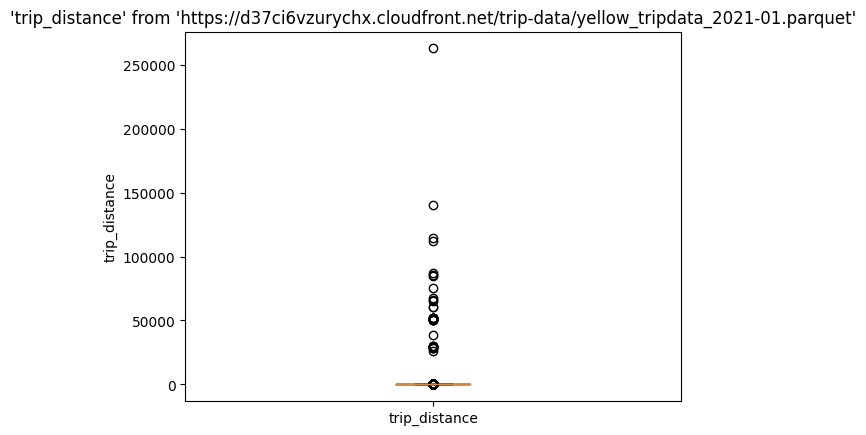

In [ ]:
%sqlplot boxplot --table https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet --column trip_distance

Now, create a query that filters by the 90th percentile.
Note the use of the `--save`, and `--no-execute` functions.
This tells JupySQL to store the query, but skips execution. It will be referenced in the next plotting call.

In [ ]:
%%sql --save short_trips --no-execute
SELECT *
FROM 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet'
WHERE trip_distance < 6.3

Skipping execution...

To create a histogram, call `%sqlplot histogram` and pass the name of the table, the column to plot, and the number of bins.
This uses `--with short_trips` so JupySQL uses the query defined previously and therefore only plots a subset of the data.

<Axes: title={'center': "'trip_distance' from 'short_trips'"}, xlabel='trip_distance', ylabel='Count'>

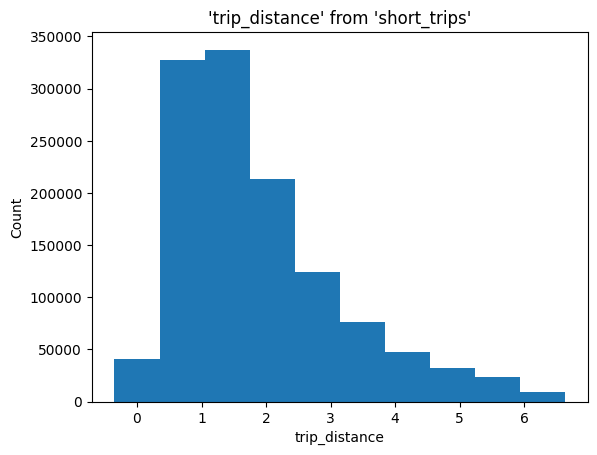

In [ ]:
%sqlplot histogram --table short_trips --column trip_distance --bins 10 --with short_trips

## Summary
You now have the ability to alternate between SQL and Pandas in a simple and highly performant way! You can plot massive datasets directly through the engine (avoiding both the download of the entire file and loading all of it into Pandas in memory). Dataframes can be read as tables in SQL, and SQL results can be output into Dataframes. Happy analyzing!